In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import model_from_json
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
data1 = pd.read_csv("all.csv")

In [ ]:
data1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Coastal Andhra Pradesh,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5,993.8,99.7,104.6,449.7,339.8
1,Coastal Andhra Pradesh,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1,1063.6,2.0,64.4,657.7,339.5
2,Coastal Andhra Pradesh,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1,1316.2,14.2,79.8,877.1,345.1
3,Coastal Andhra Pradesh,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7,860.2,1.3,144.7,462.6,251.6
4,Coastal Andhra Pradesh,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0,795.2,17.8,173.8,530.1,73.4


In [ ]:
data1 = data1[data1['YEAR'].notnull()]
data1['YEAR'] = data1.YEAR.astype('int')
data1.index = range(len(data1))

In [ ]:
data1

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Coastal Andhra Pradesh,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5,993.8,99.7,104.6,449.7,339.8
1,Coastal Andhra Pradesh,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1,1063.6,2.0,64.4,657.7,339.5
2,Coastal Andhra Pradesh,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1,1316.2,14.2,79.8,877.1,345.1
3,Coastal Andhra Pradesh,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7,860.2,1.3,144.7,462.6,251.6
4,Coastal Andhra Pradesh,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0,795.2,17.8,173.8,530.1,73.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Rayalseema,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,163.2,169.3,38.6,2.6,762.6,31.9,77.3,443.0,210.5
347,Rayalseema,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,81.4,104.6,37.8,12.8,551.8,0.9,64.2,331.5,155.2
348,Rayalseema,2015,1.9,0.0,13.4,73.4,39.7,73.0,43.1,123.6,136.3,106.7,383.8,52.2,1047.1,1.9,126.4,376.0,542.8
349,Rayalseema,2016,7.9,0.0,0.8,0.4,80.5,128.6,131.0,41.5,90.8,14.1,5.4,54.4,555.4,7.9,81.7,391.9,73.9


In [ ]:
data1 = data1.drop(columns=['JF','MAM','JJAS','OND'])

In [ ]:
data1 = data1.drop(columns=['ANNUAL'])

In [ ]:
data1.head(150)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,Coastal Andhra Pradesh,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5
1,Coastal Andhra Pradesh,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1
2,Coastal Andhra Pradesh,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1
3,Coastal Andhra Pradesh,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7
4,Coastal Andhra Pradesh,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Telangana,1929,5.3,64.8,0.0,21.7,2.8,146.0,115.0,142.2,232.5,35.9,0.0,24.5
146,Telangana,1930,0.0,14.7,5.4,13.5,1.7,184.9,131.1,144.7,215.6,60.0,64.3,0.0
147,Telangana,1931,0.3,5.1,4.0,13.3,25.9,187.3,368.6,155.9,288.1,107.4,25.5,1.6
148,Telangana,1932,0.0,40.3,1.3,17.6,25.8,119.7,300.4,179.0,172.9,32.0,60.9,0.0


In [ ]:
m_data1 = data1

In [ ]:
frames = [m_data1]
ap = pd.concat(frames)
ap_new_reg = ['Coastal Andhra Pradesh','Telangana','Rayalseema']
districts = m_data1.SUBDIVISION.unique()
years = list(range(1901, 2018))
months = ap.columns[2:]
year_month = [str(year) + '_' + month for year in years for month in months]
dates = pd.date_range(start='1901-01', freq='MS', periods=len(years)*12)
ap_data = pd.DataFrame({'Year_Month': year_month})
ap_data['Date'] = dates
ap_data[['Year', 'Month']] = ap_data['Year_Month'].str.split('_', n=1, expand=True)
ap_data = ap_data.drop(columns=['Year_Month'])

In [ ]:
m_data1

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,Coastal Andhra Pradesh,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5
1,Coastal Andhra Pradesh,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1
2,Coastal Andhra Pradesh,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1
3,Coastal Andhra Pradesh,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7
4,Coastal Andhra Pradesh,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Rayalseema,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,163.2,169.3,38.6,2.6
347,Rayalseema,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,81.4,104.6,37.8,12.8
348,Rayalseema,2015,1.9,0.0,13.4,73.4,39.7,73.0,43.1,123.6,136.3,106.7,383.8,52.2
349,Rayalseema,2016,7.9,0.0,0.8,0.4,80.5,128.6,131.0,41.5,90.8,14.1,5.4,54.4


In [ ]:
for district in districts:
    df = ap[ap.SUBDIVISION == district].drop(columns=['SUBDIVISION', 'YEAR'])
    df = pd.DataFrame(df.values.ravel(), columns=['somenew'])
    ap_data[district] = df


month_list = []
for i in ap_data.Month:
    if (i=='FEB' or i=='MAR' or i=='APR' or i=='MAY'):
        month_list.append('summer')
    elif (i=='JUN' or i=='JUL' or i=='AUG' or i=='SEP'):
        month_list.append('rainy')
    else:
        month_list.append('winter')
ap_data['season'] = month_list
leap_year_list = []
for i in ap_data.Date:
    if (i.is_leap_year):
        leap_year_list.append('leap')
    else:
        leap_year_list.append('nleap')
ap_data['leap_year'] = leap_year_list

In [ ]:
ap_data

,Date,Year,Month,Coastal Andhra Pradesh,Telangana,Rayalseema,season,leap_year
0,1901-01-01,1901,JAN,18.8,6.9,7.0,winter,nleap
1,1901-02-01,1901,FEB,80.9,41.8,50.2,summer,nleap
2,1901-03-01,1901,MAR,7.2,7.8,0.0,summer,nleap
3,1901-04-01,1901,APR,28.7,45.2,12.1,summer,nleap
4,1901-05-01,1901,MAY,68.7,22.0,38.9,summer,nleap
...,...,...,...,...,...,...,...,...
1399,2017-08-01,2017,AUG,224.2,204.2,171.6,rainy,nleap
1400,2017-09-01,2017,SEP,141.8,115.3,194.6,rainy,nleap
1401,2017-10-01,2017,OCT,123.0,114.6,221.1,winter,nleap
1402,2017-11-01,2017,NOV,46.7,1.9,33.3,winter,nleap


In [ ]:
def plotdata(x,y,name):
    plt.figure()
    plt.plot(x, color='blue', label = 'Predicted')
    plt.plot(y, color='g', label = 'Actual')
    plt.xlabel('Time stamp')
    plt.ylabel('Rainfall')
    plt.title('Actual vs pedicted Rainfall data')
    plt.legend()
    plt.show()

In [ ]:
def call_model():
    # load json and create model
    json_file = open('modell.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("modell.h5")
    print("Loaded model from disk")
    return loaded_model

In [ ]:
def error_calc(y_test,predicted_data):
    print(np.sqrt(mean_squared_error(y_test,predicted_data)))
    print(mean_absolute_error(y_test, predicted_data))

In [ ]:
def do_work(name):
    temps = ap_data[["Date", name]]
    temps.index = temps['Date']
    temps = temps.drop(columns='Date')
    data = temps
    upsampled = temps.resample('D')
    interpolated = upsampled.interpolate(method='linear')
    data = interpolated
    training_set = data.iloc[:, [0]].values
    endval = int(data.shape[0]*0.8)
    X_test = []
    y_test  = []
    for i in range(endval, int(data.shape[0])):
        X_test.append(training_set[i-60:i, 0])
        y_test.append(training_set[i,0])
    X_test = np.array(X_test)
    #print(X_test[0])
    print("lenth = ", len(X_test[0]))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    print(len(X_test),len(y_test))
    return X_test, y_test
    #regr = call_model()
    #predicted_data = regr.predict(X_test)
    #print(predicted_data[0])
    #plotdata(predicted_data, y_test, name)
    #error_calc(predicted_data, y_test)

In [ ]:
val_t,yt = do_work('Coastal Andhra Pradesh')

lenth =  60
8541 8541


In [ ]:
val_t[0][0]

array([55.63548387])

In [ ]:
yt

190.39032258064518

In [ ]:
regr = call_model()

Loaded model from disk


In [ ]:
len(regr.predict(val_t))

60

IndexError: ignored

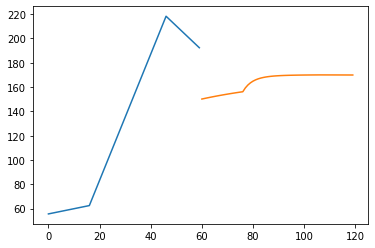

In [ ]:
for i in range(1):
  predicted_data = regr.predict(val_t)
  plt.plot(range(0,60),val_t)
  plt.plot(range(60,120),predicted_data)
  plt.plot(range(60,120),yt[:61])
  print(len(predicted_data))